Medical Advanced Data Analysis - 
By: Monike Ozeias Santos


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# load data correctly 
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()

df.head ()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Correlation & Redudancy 
Many size and shape-related features (e.g. radius, perimeter, area) are highly correlated, indicating redudancy in the dataset. This motivates dimensionality reduction or careful feature selection in future modeling. 

Prepare features

In [3]:
# Separate features and target
X = df.drop(columns=["target"])
y = df["target"]

X.shape, y.shape

((569, 30), (569,))

Correlation Matrix
Purpose: Compute correlations

In [4]:
corr = X.corr()
corr.shape

(30, 30)

Correlation heatmap

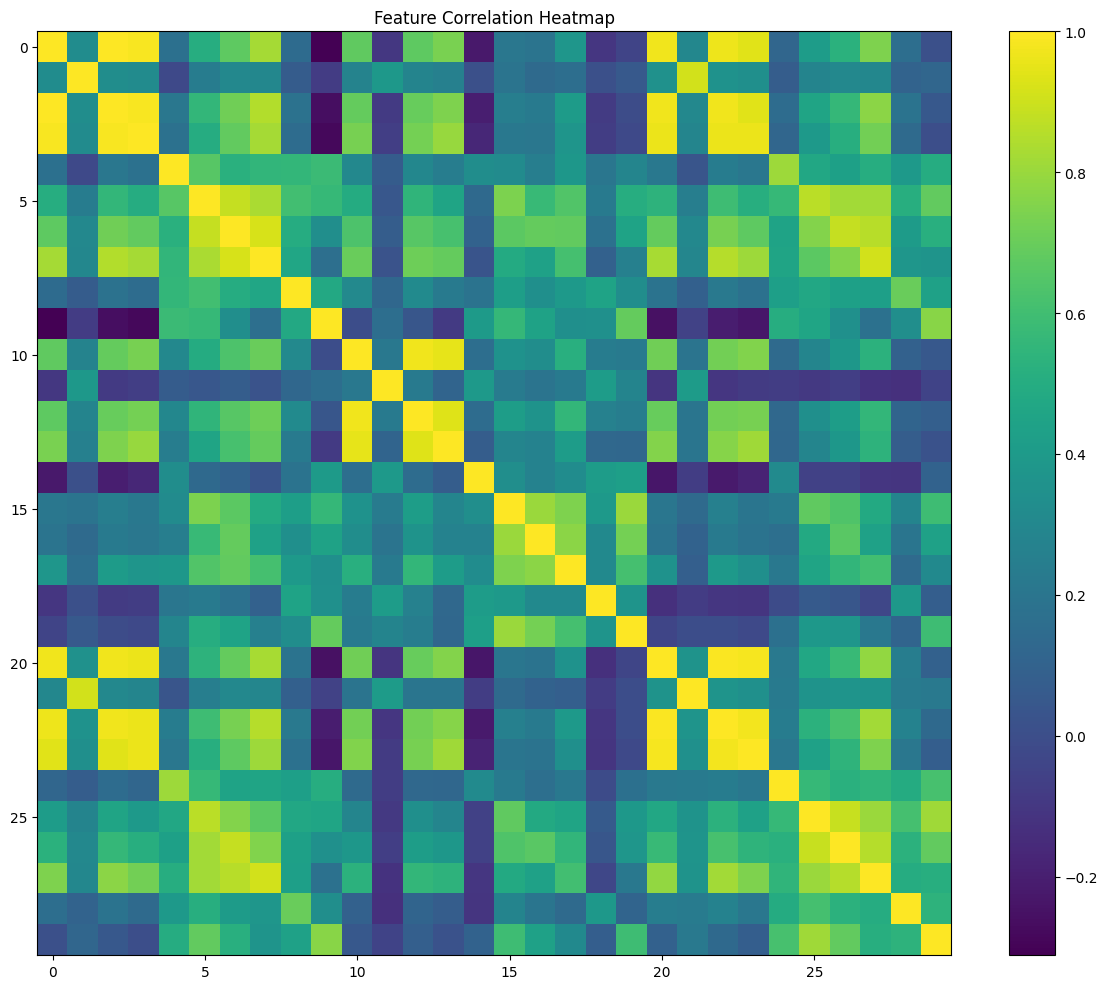

In [5]:
plt.figure(figsize=(12, 10))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("images/correlation_heatmap.png", dpi=200)
plt.show()

Highly Correlated feature pairs
Purpose: analysis logic

In [ ]:
threshold = 0.9
pair = []
cols = corr.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = corr.iloc[i, j]
        if abs(val) >= threshold:
            pairs.append((cols[i], cols[j], val))

pairs_sorted = sorted(pairs, key=lambda x:abs(x[2]), reverse=True)
pairs_sorted[:15]

## PCA (Dimensionality Reduction)
PCA reduces the dataset to a smaller number of components that capture the most variance. 
This helps visualize structure in high-dimensional data and highlights redudancy between features.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Features and target
x = df.drop(columns=["target"])
y = df["target"]

#Standardise features (important for PCA)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#PCA to 2 components for visualisition 
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

#Variance explained
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()


(array([0.44272026, 0.18971182]), np.float64(0.6324320765155944))

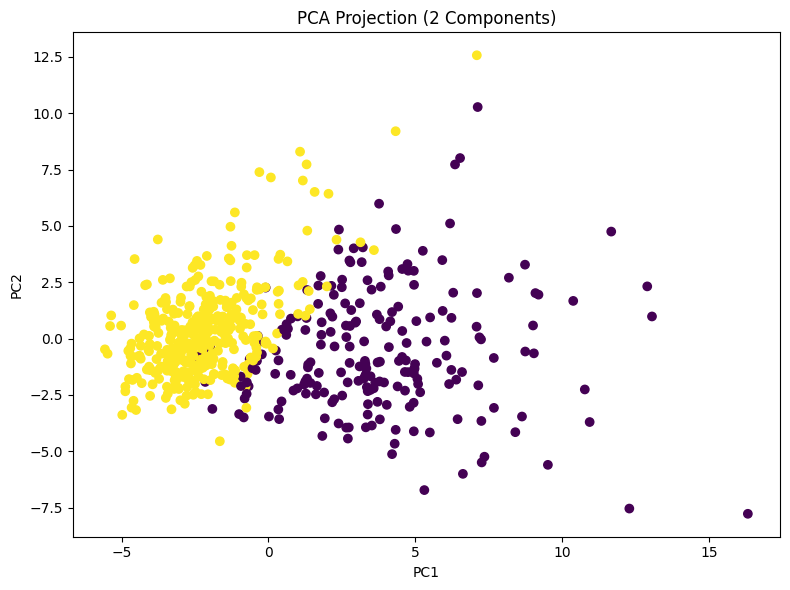

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.title("PCA Projection (2 Components)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.savefig("images/pca_projection.png", dpi=200)
plt.show()

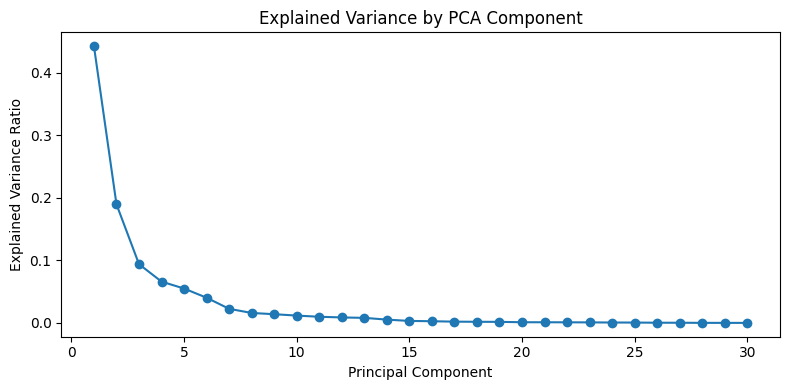

In [12]:
#Scree-style bar chart
pca_full = PCA()
pca_full.fit(x_scaled)

explained = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained) + 1), explained, marker="o")
plt.title("Explained Variance by PCA Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()
plt.savefig("images/pca_explained_variance.png", dpi=200)
plt.show()

## PCA Observation
- The first two principal components capture a portion of the overall variance in the dataset.
- The PCA projection shows some separation between benign and malignant samples, suggesting that the dataset contains strong structure.
- This supports the earlier correlation findings: many original features are related, and PCA can compress them into fewer dimensions. 

In [2]:
import sys
sys.executable


'c:\\Users\\monik\\OneDrive - Technological University Dublin\\2nd year github projects\\medical-advanced-analysis\\.venv\\Scripts\\python.exe'